# A1.4 Realistic Projectile Motion Project 1: Covid-19 
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.4.1 Objective
The recommendation for safe physical distancing is 6 ft to limit the spread of the SARS-CoV-2 virus also known as the COVID-19. The objective of this project is to find out of 6 ft really is a safe distance or just something put forth by scientists who barely passed physics.
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.4.2 Background

### Physics Background
We have explored kinematics and numerical methods on how to solve first order differential equations that can not be solved through analytical integration. This allow us to study a more realistic trajectory for the COVID-19 molecule in comparison to the textbook standard projectile motion.

The trajectory of the molecule(s) can be parameterized by $x$- and $y$-positions (with $y$ being our vertical direction) in a $xy$-plane with these positions dictated through accelerations and velocites. Obviously, we have the acceleration of gravity acting on the molecule(s) in the vertical direction, but we will go one step futher and include acceleration due to air drag after the molecule(s) leave the host. 

### Covid-19 Molecule

<img src="covid.jpeg" width="300">

The Covid-19 pandemic was caused by the SARS-CoV-2 virus and predominantly spread through droplet transmission via breathing talk, cough, and sneeze. Due to its effective transmission and novel nature, it caused a pandemic and affected the life of everyone more or less. While the most severe cases resulted in deaths, a majority of people only exhibited cold-like symptoms. 

The novel nature of the virus implies that we do not have a clear picture of long-term effects of this virus and as such, catious behaviors are recommended to limit its transmission. The number one recommendation to spread the virus is termed <b>social distancing</b>, which is an absolutely ridiculous term as it clearly refers to <b>physical distancing</b>. The goal is to avoid physical interactions of close proximity. Social interactions can take place over large distances via phone or computer and has absolutely no capability of transmitting the virus. 

Obviously this term was coined by either a politician, liberal arts graduate, or a social "scientist" (this is of course ment as a physics joke. I have nothing againts people with these careers or education background, I just do not respect them. Okay, that last one was another physics jokes as we are known to be among the most arrogant people :)  I do respect them as well, yet, the social distancing terminology is still mindboggling to me. How do you measure a social distance? Apparently in feet, just like a physical distance: "Hey, you over there, a social distance of 6 ft from me".
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.4.3 Methodology

### Numerical Method
The numerical scheme will attempt to approximate the $x$- and $y$-positions from the respective accelerations through

$$ \vec{a} = \frac{d^2\vec{r}}{dt^2} $$

or in component form:

$$ a_x = \frac{d^{2}x}{dt^2} $$

$$ a_y = \frac{d^{2}y}{dt^2} $$

Unfortunately, we have not learned about finite difference methods for second derivative, only first derivative. So what do we do? Well, we can convert each of the two second-order differential equations (DE) into two coupled first-order differential equations, giving us four equations to solve:

<div class="alert alert-success">
    
$$ a_x = \frac{dv_x}{dt} \tag{1}$$

$$ a_y = \frac{dv_y}{dt} \tag{2}$$

$$ v_x = \frac{dx}{dt} \tag{3}$$

$$ v_y = \frac{dy}{dt} \tag{4}$$
</div>

Since these 4 equations are all first-order DE, we can apply the finitie difference method that we have learned.

Using the finite different method, we perform numerical integration by **stepping** or **propagating** an initial condition through our model to approximate the solution. This is known as an **iterative** solution. In this process, we replace the derivative with differences:

$$ \frac{df}{dx} \rightarrow \frac{f_{i+1} - f{i}}{\Delta x} $$

If we replace the derivatives in Equations 1-4 with the differences, we have

$$ a_{x,i} = \frac{v_{x,i+1} - v_{x,i}}{\Delta t}\tag{1}$$

$$ a_{y,i} = \frac{v_{y,i+1} - v_{y,i}}{\Delta t} \tag{2}$$

$$ v_{x,i} = \frac{x_{i+1} - x_{i}}{\Delta t} \tag{3}$$

$$ v_{y,i} = \frac{x_{i+1} - x_{i}}{\Delta t} \tag{4}$$

Solving for the updated values (those with the subscripts $i+1$):

$$ v_{x,i+1} = v_{x,i} + a_{x,i}\Delta t $$

$$ v_{y,i+1} = v_{y,i} + a_{y,i}\Delta t $$

$$ x_{i+1} = x_{i} + v_{x,i}\Delta t $$

$$ y_{i+1} = y_{i} + v_{y,i}\Delta t $$

We can identify our acceleration in the vertical as the acceleration of gravity: 

$$ a_{y} = -g $$

and assume it is constant for our purpose. However, we must also incorporate the acceleration components due to air drag.


### Air Drag
These molecules leave the host at relatively high speeds and the appropriate magnitude of the acceleration due to air drag is

$$a_{drag} = \frac{1}{2}\frac{\rho C_{D}A}{m}v^{2} $$

where $\rho$ is the density of the gas/fluid the object moves in. The speed of the object is $v$, $C_D$ is a drag coefficient that depends on the shape of the object, $A$ is the cross-sectional area of the object as it moves through the gas/fluid, and $m$ is the mass of the object. 

We need to find the $x$- and $y$-components of this acceleration to implement into the numerical equations. 

#### Air Drag Components
Let us try and find the x-component. We will assume a standard xy-reference system (y is upward) and an angle $\theta$ measured CCW with respect to positive x-axis. We then have

$$ a_{drag,x} = a_{drag}\cos\theta \tag{5}$$

For the instantaneous velocity at that time of consideration, we also have

$$ v_x = v\cos\theta $$

which implies that $\cos\theta = \frac{v_x}{v}$. Inserting this into Equation 5, we get

$$ a_{drag,x} = a_{drag}\frac{v_x}{v} $$

If we insert the expression for the acceleration due to air drag, we get:

$$ a_{drag,x} = \left(\frac{1}{2}\frac{\rho C_{D}A}{m}v^{2}\right)\frac{v_x}{v} $$

and simplify:


$$ a_{drag,x} = \frac{1}{2}\frac{\rho C_{D}A}{m}vv_x $$

Similarly, we have for the y-component

$$ a_{drag,y} = \frac{1}{2}\frac{\rho C_{D}A}{m}vv_y $$

### Iterative Equations
Inserting the acceleration components into the iterativative equations and take into account the sign of the accelerations, our specific iterative equations to solve are then:

<div class="alert alert-success">
    
$$ v_{x,i+1} = v_{x,i} - \frac{1}{2}\frac{\rho C_{D}A}{m}v_{i}v_{x,i}\Delta t $$

$$ v_{y,i+1} = v_{y,i} - \left( g +  \frac{1}{2}\frac{\rho C_{D}A}{m}v_{i}v_{y,i}\right)\Delta t $$

$$ x_{i+1} = x_{i} + v_{x,i}\Delta t $$

$$ y_{i+1} = y_{i} + v_{y,i}\Delta t $$
</div>

### Auxiliary Equations and Values
We have a few more equations we need to calculate parameters in the accelerations due to air drag:

* Density of air: $\rho_{air} = 1.28$ kg/m$^3$
* Drag parameter: $C_D = 0.47$
* Cross-sectional area of virus/droplet: A (see section below)
* Mass of virus: m (see section below)
* speed: $v = \sqrt{v_x^2 + v_y^2} $

Before we can start our numerical scheme, we determine what we need to address our objective. We have two scenarios for spreading the molecule(s) through the air:

1. Covid-19 molecules are embedded in a larger respiratory droplet through sneezing or coughing.
2. Individual molecule(s) through breathing and talking.

These two scenarios have very different initial velocity conditions:

* Sneeze: initial velocity $\sim 15$ m/s.
* Breathing: initial velocity $\sim 1$ m/s.

For the parameters needed to estimate the air drag, we have

* sneeze droplet: R = 30 $\mu$m
* Covid molecule: R = 0.05 $\mu$m
* density of droplet: $rho_{droplet} = 1.3$ g/mL . The mass is apparently really difficult to find online :)
* mass of Covid-19 molecule: m = 30 kDa (kilo Dalton)

The cross sectional area $A$ is:

$$ A = \pi R^2$$

while the mass can be found from the density and volume (assuming spherical object)

$$ m = V \rho_{droplet} = \frac{4}{3}\pi R^3\rho_{droplet} $$

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.4.4 Results 
We will implement the numerical approach into a Python script below. It can also be done in an Excel sheet if desireable. 

We will assume the following:

* initial height is that of an average adult person: 5 ft 7" or 1.70 m.
* the virus is ejected horizontally.

### Sneeze Droplet

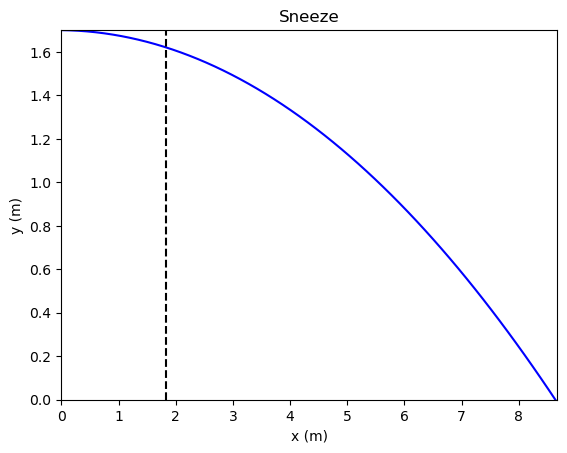

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#define our constants
g = 9.81
rho_air = 1.28
c_d = 0.47
R = 3.0E-5
rho_droplet = 1.3*1000.0  #( 1 g/mL  = 1000 kg/m^3)

#calculate cross section area of droplet
A = np.pi*R**2

#calculate mass of droplet
m = rho_droplet * (4.0/3.0)*np.pi*R**(3)*rho_droplet

# initial conditions
x = 0
y = 1.70
vx = 15.0
vy = 0.0

#choose time step
dt = 0.01

x_arr = [x]
y_arr = [y] 

# now it is time to iterate forward:
while y > 0:
    
    v = np.sqrt(vx**2 + vy**2)
    
    ax = (0.5 * rho_air * c_d * A/m) * v * vx 
    vx = vx - ax*dt
    
    ay = g + (0.5 * rho_air * c_d * A/m) * v * vy 
    vy = vy - ay*dt
    
    x = x + vx * dt
    y = y + vy * dt
    
    x_arr.append(x)
    y_arr.append(y)

# Plotting

plt.figure()
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('Sneeze')
ax = plt.gca()
ax.plot(x_arr,y_arr,'b')

ax.set_xlim([0, np.max(x_arr)])
ax.set_ylim([0, np.max(y_arr)])

ax.axvline(x=1.83, linestyle='--', color='k')

plt.show() 

#### Quick Observation
The dashed line represents the 6 ft distance. It is evident that the droplet has not dropped significantly within the 6 ft distance. However, the droplet will miss the resporatory system between adults of normal heights.
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

### Breathing

157710.47457780084


/var/folders/74/jtxzz5d9637f574hh5cmbq240000gn/T/ipykernel_9975/1728733566.py:62: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([0, np.max(x_arr)])


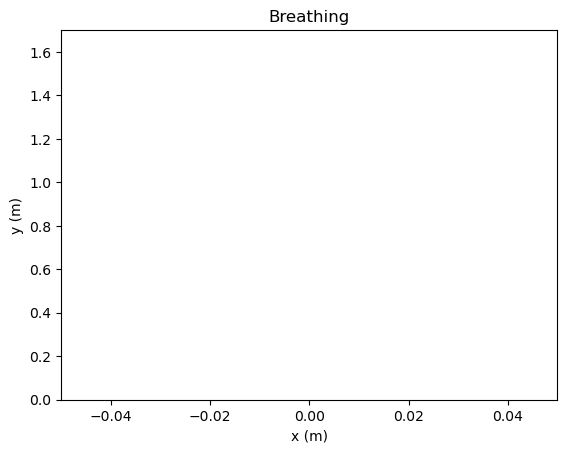

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#define our constants
g = 9.81
rho_air = 1.28
c_d = 0.47
R = 5.0E-8
m = 30.0E3 * 1.66E-24   #convert from Dalton to kg

#calculate cross section area of virus
A = np.pi*R**2

print(A/m)

# initial conditions
x = 0
y = 1.70
vx = 1.0
vy = 0.0

#choose time step
dt = 0.1

x_arr = [x]
y_arr = [y] 

# now it is time to iterate forward:
while y > 0:
    
    v = np.sqrt(vx**2 + vy**2)
    
    ax = (0.5 * rho_air * c_d * A/m) * v * vx 
    vx = vx - ax*dt
    
    if vx < 0:
        break
    
    ay = g + (0.5 * rho_air * c_d * A/m) * v * vy 
    vy = vy - ay*dt
    
    if vy < 0:
        break
    
    x = x + vx * dt
    y = y + vy * dt
    
    x_arr.append(x)
    y_arr.append(y)

# Plotting

plt.figure()
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('Breathing')
ax = plt.gca()
ax.plot(x_arr,y_arr,'b')

ax.set_xlim([0, np.max(x_arr)])
ax.set_ylim([0, np.max(y_arr)])

ax.axvline(x=1.83, linestyle='--', color='k')

plt.show() 

#### Quick Observation
This just does not work! I inserted break statements in the code. Try and remove them so see what happens. The ratio of A/m is very large. This is causing the magnitudes of the velocity components to become very large in the first iteration. In the next iteration that results in a net positive acceleration, which is not realistic! 

**Our model does not work on the single SAR-CoV-2 molecule**. This may not be surprising as other physical interactions becomes important and the air drag model we used is not suitable for this system. While our numerical iterations works just fine, it gives us erronous results due to wrong physics incorporated. The most important element here is the influence of air currents, which we have ignored. **Air currents are capable of suspending these molecules in the air for several hours**!
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.4.5 Summary

Our results above showed that a droplet containing thousands of SAR-CoV-2 virusses are capable of traveling a horizontal distance of ~9 meters through a sneeze from an average adult person with a height of 5'7". The use of masks prevents these droplets to propagate and is therefore a excellent source of migitating the spread of the virus.

Our results also showed that our physical model was not appropriate to work with particles sizes similar to the virus itself. Additonal physics must be implemented to properly address the propagation distance of these smaller particles.
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.4.6 References

1. Tang J.W., et al. (2013) Airflow Dynamics of Human Jets: Sneezing and Breathing - Potential Sources of Infectious Aerosols, PLoS ONE 8(4): e59970. doi:10.1371/journal.pone.0059970 

2. Chaudhuri, S., et al. (2020) Modeling the role of respiratory droplets in Covid-19 type pandemics, Phys. Fluids 32, 063309 (2020); doi:10.1063/5.0015984

3. VanSciver, M. , et al. (2011) Particle Image Velocimetry of Human Cough, Aerosol Science and Technology, 45:3, 415-422, doi:10.1080/02786826.2010.542785

4. Han Z.Y., et al. (2013) Characterizations of particle size distribution of the droplets exhaled by sneeze, J.R. Soc. Interface 10: 20130560.http://dx.doi.org/10.1098/rsif.2013.0560

5. Dhand R., and J. Li (2020) Coughs and Sneezes: Their Role in Transmission of Respiratory Viral Infections, Including SARS-CoV-2, Am. J. Respir. Crit. Care Med., Vol 202, Iss. 5, pp 651–659.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">